# Portfolio Analyzer

In [86]:
#pip install polygon-api-client

In [86]:
#pip install polygon-api-client

In [ ]:
#from polygon import RESTClient

In [3]:
#import the necessary modules
import pandas as pd
import numpy as np
#questionary
from pathlib import Path
import fire
import questionary
#API
import os
import json
import requests
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
%matplotlib inline


In [4]:
from oIPythn.display import display_html 

In [5]:
POLYGON_API_KEY ='enZp2AUpH4pGXJJuQ1CbjdVXJIsBFBEl'

In [6]:
# Load .env enviroment variables into the notebook
#load_dotenv()

In [7]:
# Get the API key from the environment variable and store as Python variable
#polygon_api_key = os.getenv("POLYGON_API_KEY")

# Using the type funcion, confirm that the Nasdaq API key is available for use in the notebook
#type(polygon_api_key)

In [8]:
ticker_list = ["AMZN", "RTH", "AMT", "IYR", "XOM", "XLE", "SPY"]

In [9]:
import requests
import datetime
from time import sleep
from tqdm import tqdm
def get_prices(start_date,end_date,universe):
    data = pd.DataFrame()
    # end_at = datetime.datetime.now() 
    # begin_from = end_at + datetime.timedelta(days=-5000)
    for t in tqdm(universe):
        print(t)
        print(len(data))
        # for start in pd.date_range(start = begin_from, end = end_at,normalize=True,freq = '88D'):
        #     end = start + datetime.timedelta(days = 88)
        #     end = str(int((end - datetime.datetime(1970,1,1)).total_seconds()))
        #     start = str(int((start - datetime.datetime(1970,1,1)).total_seconds()))
        try:
            r = requests.get(f'https://api.polygon.io/v2/aggs/ticker/{t}/range/1/day/{start_date}/{end_date}?apiKey={POLYGON_API_KEY}')
        except json.JSONDecodeError:
            pass
        try:
            # print(r.json())
            temp_data = pd.DataFrame(r.json()['results'])
            temp_data['ticker'] = t
            data = data.append(temp_data, ignore_index=True)
            print(t+':'+str(pd.to_datetime(start_date, unit='s'))+':'+str(pd.to_datetime(end_date, unit='s')))
        except KeyError:
            print(f'{t} was not found')
            pass
        except ValueError:
            pass
        except ConnectionError as error:
            print(error)
            sleep(200)
            continue
        except TimeoutError as error:
            print(error)
            sleep(200)
            continue
        sleep(0.25)
#     data.to_csv(file_name,index = False)
    data.t = pd.to_datetime(data.t, unit = 'ms')
    columns_name = {'t': 'time', 'o': 'Open', 'c': 'Close', 'h': 'High', 'l': 'Low', 'v': 'Volume'} 
    data= data.rename(columns = columns_name)
    data = data[['time','ticker','Open', 'Close','High', 'Low', 'Volume']]
    data = data.set_index(['time', 'ticker'])
    data["daily_returns"] = data['Close'].groupby('ticker').pct_change()
    data = data.dropna()
    #data.to_csv(file_name, index = False)
    return data

In [10]:
#f"https://api.polygon.io/v2/aggs/ticker/{t}/range/1/day/{start_date}/{end_date}?apiKey=rHtIrGbGhJY6umnXSqp6hYgTM3XnHI2_"

In [11]:
# Create `start_date` and `end_date` variables for the period before the pandemic
start_date = "2017-03-01"
end_date = "2020-03-01"
all_data = get_prices(start_date=start_date, end_date=end_date, universe=ticker_list)
#example
#big_mac_usa = "https://data.nasdaq.com/api/v3/datasets/ECONOMIST/BIGMAC_USA?start_date=" + start_date + "&end_date=" + end_date + "&api_key=" + nasdaq_api_key

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

AMZN
0


 14%|████████████                                                                        | 1/7 [00:03<00:23,  3.92s/it]

RTH
571


 29%|████████████████████████                                                            | 2/7 [00:05<00:12,  2.45s/it]

AMT
1142


 43%|████████████████████████████████████                                                | 3/7 [00:06<00:08,  2.06s/it]

IYR
1713


 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:06,  2.29s/it]

XOM
2284


 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:11<00:04,  2.03s/it]

XLE
2855


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:13<00:02,  2.28s/it]

SPY
3426


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.24s/it]


In [12]:
all_data.index

MultiIndex([('2017-11-21 05:00:00', 'AMZN'),
            ('2017-11-22 05:00:00', 'AMZN'),
            ('2017-11-24 05:00:00', 'AMZN'),
            ('2017-11-27 05:00:00', 'AMZN'),
            ('2017-11-28 05:00:00', 'AMZN'),
            ('2017-11-29 05:00:00', 'AMZN'),
            ('2017-11-30 05:00:00', 'AMZN'),
            ('2017-12-01 05:00:00', 'AMZN'),
            ('2017-12-04 05:00:00', 'AMZN'),
            ('2017-12-05 05:00:00', 'AMZN'),
            ...
            ('2020-02-14 05:00:00',  'SPY'),
            ('2020-02-18 05:00:00',  'SPY'),
            ('2020-02-19 05:00:00',  'SPY'),
            ('2020-02-20 05:00:00',  'SPY'),
            ('2020-02-21 05:00:00',  'SPY'),
            ('2020-02-24 05:00:00',  'SPY'),
            ('2020-02-25 05:00:00',  'SPY'),
            ('2020-02-26 05:00:00',  'SPY'),
            ('2020-02-27 05:00:00',  'SPY'),
            ('2020-02-28 05:00:00',  'SPY')],
           names=['time', 'ticker'], length=3990)

In [13]:
idx = pd.IndexSlice

In [14]:
AMZN_daily_returns_df = all_data.loc[idx[:,'AMZN'],['daily_returns']]
AMZN_daily_returns_df

daily_returns
time                ticker               
2017-11-21 05:00:00 AMZN         0.011702
2017-11-22 05:00:00 AMZN         0.014629
2017-11-24 05:00:00 AMZN         0.025810
2017-11-27 05:00:00 AMZN         0.008288
2017-11-28 05:00:00 AMZN        -0.001865
...                                   ...
2020-02-24 05:00:00 AMZN        -0.041356
2020-02-25 05:00:00 AMZN        -0.018191
2020-02-26 05:00:00 AMZN         0.003472
2020-02-27 05:00:00 AMZN        -0.048136
2020-02-28 05:00:00 AMZN        -0.000292

[570 rows x 1 columns]

In [15]:
RTH_daily_returns_df = all_data.loc[idx[:,'RTH'],['daily_returns']]
RTH_daily_returns_df

daily_returns
time                ticker               
2017-11-21 05:00:00 RTH          0.003172
2017-11-22 05:00:00 RTH          0.004450
2017-11-24 05:00:00 RTH          0.000000
2017-11-27 05:00:00 RTH          0.003381
2017-11-28 05:00:00 RTH          0.016849
...                                   ...
2020-02-24 05:00:00 RTH         -0.026701
2020-02-25 05:00:00 RTH         -0.023793
2020-02-26 05:00:00 RTH         -0.001961
2020-02-27 05:00:00 RTH         -0.041607
2020-02-28 05:00:00 RTH         -0.017861

[570 rows x 1 columns]

In [16]:
AMT_daily_returns_df = all_data.loc[idx[:,'AMT'],['daily_returns']]
AMT_daily_returns_df

daily_returns
time                ticker               
2017-11-21 05:00:00 AMT          0.002530
2017-11-22 05:00:00 AMT         -0.008732
2017-11-24 05:00:00 AMT          0.013695
2017-11-27 05:00:00 AMT          0.006314
2017-11-28 05:00:00 AMT          0.002766
...                                   ...
2020-02-24 05:00:00 AMT         -0.007692
2020-02-25 05:00:00 AMT          0.004202
2020-02-26 05:00:00 AMT         -0.014098
2020-02-27 05:00:00 AMT         -0.040137
2020-02-28 05:00:00 AMT         -0.026317

[570 rows x 1 columns]

In [17]:
IYR_daily_returns_df = all_data.loc[idx[:,'IYR'],['daily_returns']]
IYR_daily_returns_df

daily_returns
time                ticker               
2017-11-21 05:00:00 IYR          0.007198
2017-11-22 05:00:00 IYR         -0.002786
2017-11-24 05:00:00 IYR          0.002065
2017-11-27 05:00:00 IYR         -0.004121
2017-11-28 05:00:00 IYR         -0.002191
...                                   ...
2020-02-24 05:00:00 IYR         -0.013372
2020-02-25 05:00:00 IYR         -0.026803
2020-02-26 05:00:00 IYR         -0.010497
2020-02-27 05:00:00 IYR         -0.052410
2020-02-28 05:00:00 IYR         -0.031257

[570 rows x 1 columns]

In [18]:
XOM_daily_returns_df = all_data.loc[idx[:,'XOM'],['daily_returns']]
XOM_daily_returns_df

daily_returns
time                ticker               
2017-11-21 05:00:00 XOM          0.003973
2017-11-22 05:00:00 XOM          0.002844
2017-11-24 05:00:00 XOM          0.003946
2017-11-27 05:00:00 XOM         -0.003807
2017-11-28 05:00:00 XOM          0.006904
...                                   ...
2020-02-24 05:00:00 XOM         -0.046846
2020-02-25 05:00:00 XOM         -0.038325
2020-02-26 05:00:00 XOM         -0.021956
2020-02-27 05:00:00 XOM         -0.060177
2020-02-28 05:00:00 XOM          0.032517

[570 rows x 1 columns]

In [19]:
XLE_daily_returns_df = all_data.loc[idx[:,'XLE'],['daily_returns']]
XLE_daily_returns_df

daily_returns
time                ticker               
2017-11-21 05:00:00 XLE          0.002230
2017-11-22 05:00:00 XLE          0.004005
2017-11-24 05:00:00 XLE          0.002807
2017-11-27 05:00:00 XLE         -0.010165
2017-11-28 05:00:00 XLE          0.007739
...                                   ...
2020-02-24 05:00:00 XLE         -0.046177
2020-02-25 05:00:00 XLE         -0.044152
2020-02-26 05:00:00 XLE         -0.030186
2020-02-27 05:00:00 XLE         -0.053478
2020-02-28 05:00:00 XLE         -0.000883

[570 rows x 1 columns]

In [20]:
SPY_daily_returns_df = all_data.loc[idx[:,'SPY'],['daily_returns']]
SPY_daily_returns_df

daily_returns
time                ticker               
2017-11-21 05:00:00 SPY          0.006543
2017-11-22 05:00:00 SPY         -0.000885
2017-11-24 05:00:00 SPY          0.002310
2017-11-27 05:00:00 SPY         -0.000499
2017-11-28 05:00:00 SPY          0.010145
...                                   ...
2020-02-24 05:00:00 SPY         -0.033165
2020-02-25 05:00:00 SPY         -0.030302
2020-02-26 05:00:00 SPY         -0.003678
2020-02-27 05:00:00 SPY         -0.044912
2020-02-28 05:00:00 SPY         -0.004202

[570 rows x 1 columns]

In [21]:
tech_daily_returns = pd.concat([AMZN_daily_returns_df, RTH_daily_returns_df], keys=["AMZN","RTH"])
tech_daily_returns

daily_returns
     time                ticker               
AMZN 2017-11-21 05:00:00 AMZN         0.011702
     2017-11-22 05:00:00 AMZN         0.014629
     2017-11-24 05:00:00 AMZN         0.025810
     2017-11-27 05:00:00 AMZN         0.008288
     2017-11-28 05:00:00 AMZN        -0.001865
...                                        ...
RTH  2020-02-24 05:00:00 RTH         -0.026701
     2020-02-25 05:00:00 RTH         -0.023793
     2020-02-26 05:00:00 RTH         -0.001961
     2020-02-27 05:00:00 RTH         -0.041607
     2020-02-28 05:00:00 RTH         -0.017861

[1140 rows x 1 columns]

In [22]:
RE_daily_returns = pd.concat([AMT_daily_returns_df, IYR_daily_returns_df], keys=["AMT","IYR"])
RE_daily_returns

daily_returns
    time                ticker               
AMT 2017-11-21 05:00:00 AMT          0.002530
    2017-11-22 05:00:00 AMT         -0.008732
    2017-11-24 05:00:00 AMT          0.013695
    2017-11-27 05:00:00 AMT          0.006314
    2017-11-28 05:00:00 AMT          0.002766
...                                       ...
IYR 2020-02-24 05:00:00 IYR         -0.013372
    2020-02-25 05:00:00 IYR         -0.026803
    2020-02-26 05:00:00 IYR         -0.010497
    2020-02-27 05:00:00 IYR         -0.052410
    2020-02-28 05:00:00 IYR         -0.031257

[1140 rows x 1 columns]

In [23]:
energy_daily_returns = pd.concat([XOM_daily_returns_df, XLE_daily_returns_df], keys=["XOM","XLE"])
energy_daily_returns

daily_returns
    time                ticker               
XOM 2017-11-21 05:00:00 XOM          0.003973
    2017-11-22 05:00:00 XOM          0.002844
    2017-11-24 05:00:00 XOM          0.003946
    2017-11-27 05:00:00 XOM         -0.003807
    2017-11-28 05:00:00 XOM          0.006904
...                                       ...
XLE 2020-02-24 05:00:00 XLE         -0.046177
    2020-02-25 05:00:00 XLE         -0.044152
    2020-02-26 05:00:00 XLE         -0.030186
    2020-02-27 05:00:00 XLE         -0.053478
    2020-02-28 05:00:00 XLE         -0.000883

[1140 rows x 1 columns]

In [24]:
#Display all sectors of the stock/ETF dataframes
dfT_style = tech_daily_returns.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Tech")
dfR_style = RE_daily_returns.style.set_table_attributes("style='display:inline'").set_caption("Real Estate")
dfE_style = energy_daily_returns.style.set_table_attributes("style='display:inline'").set_caption("Energy")


display_html(dfT_style._repr_html_() + dfR_style._repr_html_() + dfE_style._repr_html_(), raw=True)

Tech 
 
 
   
   
   
 daily_returns 
 
 
   
 time 
 ticker 
   
 
 
 
 
 AMZN 
 2017-11-21 05:00:00 
 AMZN 
 0.011702 
 
 
 2017-11-22 05:00:00 
 AMZN 
 0.014629 
 
 
 2017-11-24 05:00:00 
 AMZN 
 0.025810 
 
 
 2017-11-27 05:00:00 
 AMZN 
 0.008288 
 
 
 2017-11-28 05:00:00 
 AMZN 
 -0.001865 
 
 
 2017-11-29 05:00:00 
 AMZN 
 -0.027086 
 
 
 2017-11-30 05:00:00 
 AMZN 
 0.013330 
 
 
 2017-12-01 05:00:00 
 AMZN 
 -0.012237 
 
 
 2017-12-04 05:00:00 
 AMZN 
 -0.024433 
 
 
 2017-12-05 05:00:00 
 AMZN 
 0.006720 
 
 
 2017-12-06 05:00:00 
 AMZN 
 0.009443 
 
 
 2017-12-07 05:00:00 
 AMZN 
 0.006456 
 
 
 2017-12-08 05:00:00 
 AMZN 
 0.001906 
 
 
 2017-12-11 05:00:00 
 AMZN 
 0.005955 
 
 
 2017-12-12 05:00:00 
 AMZN 
 -0.003285 
 
 
 2017-12-13 05:00:00 
 AMZN 
 -0.000815 
 
 
 2017-12-14 05:00:00 
 AMZN 
 0.008702 
 
 
 2017-12-15 05:00:00 
 AMZN 
 0.004156 
 
 
 2017-12-18 05:00:00 
 AMZN 
 0.009702 
 
 
 2017-12-19 05:00:00 
 AMZN 
 -0.002688 
 
 
 2017-12-20 05:00:00 
 AMZN 
 -0.008220 
 
 
 2017-12-21 05:00:00 
 AMZN 
 -0.002429 
 
 
 2017-12-22 05:00:00 
 AMZN 
 -0.005448 
 
 
 2017-12-26 05:00:00 
 AMZN 
 0.007190 
 
 
 2017-12-27 05:00:00 
 AMZN 
 0.004674 
 
 
 2017-12-28 05:00:00 
 AMZN 
 0.003248 
 
 
 2017-12-29 05:00:00 
 AMZN 
 -0.014021 
 
 
 2018-01-02 05:00:00 
 AMZN 
 0.016708 
 
 
 2018-01-03 05:00:00 
 AMZN 
 0.012775 
 
 
 2018-01-04 05:00:00 
 AMZN 
 0.004476 
 
 
 2018-01-05 05:00:00 
 AMZN 
 0.016163 
 
 
 2018-01-08 05:00:00 
 AMZN 
 0.014425 
 
 
 2018-01-09 05:00:00 
 AMZN 
 0.004676 
 
 
 2018-01-10 05:00:00 
 AMZN 
 0.001301 
 
 
 2018-01-11 05:00:00 
 AMZN 
 0.017818 
 
 
 2018-01-12 05:00:00 
 AMZN 
 0.022339 
 
 
 2018-01-16 05:00:00 
 AMZN 
 -0.000260 
 
 
 2018-01-17 05:00:00 
 AMZN 
 -0.007556 
 
 
 2018-01-18 05:00:00 
 AMZN 
 -0.001297 
 
 
 2018-01-19 05:00:00 
 AMZN 
 0.000974 
 
 
 2018-01-22 05:00:00 
 AMZN 
 0.025282 
 
 
 2018-01-23 05:00:00 
 AMZN 
 0.026542 
 
 
 2018-01-24 05:00:00 
 AMZN 
 -0.003692 
 
 
 2018-01-25 05:00:00 
 AMZN 
 0.015057 
 
 
 2018-01-26 05:00:00 
 AMZN 
 0.017490 
 
 
 2018-01-29 05:00:00 
 AMZN 
 0.011148 
 
 
 2018-01-30 05:00:00 
 AMZN 
 0.014206 
 
 
 2018-01-31 05:00:00 
 AMZN 
 0.009090 
 
 
 2018-02-01 05:00:00 
 AMZN 
 -0.041967 
 
 
 2018-02-02 05:00:00 
 AMZN 
 0.028741 
 
 
 2018-02-05 05:00:00 
 AMZN 
 -0.027938 
 
 
 2018-02-06 05:00:00 
 AMZN 
 0.038014 
 
 
 2018-02-07 05:00:00 
 AMZN 
 -0.018062 
 
 
 2018-02-08 05:00:00 
 AMZN 
 -0.046782 
 
 
 2018-02-09 05:00:00 
 AMZN 
 -0.008071 
 
 
 2018-02-12 05:00:00 
 AMZN 
 0.034809 
 
 
 2018-02-13 05:00:00 
 AMZN 
 0.020401 
 
 
 2018-02-14 05:00:00 
 AMZN 
 0.025832 
 
 
 2018-02-15 05:00:00 
 AMZN 
 0.007381 
 
 
 2018-02-16 05:00:00 
 AMZN 
 -0.008941 
 
 
 2018-02-20 05:00:00 
 AMZN 
 0.013571 
 
 
 2018-02-21 05:00:00 
 AMZN 
 0.009923 
 
 
 2018-02-22 05:00:00 
 AMZN 
 0.001632 
 
 
 2018-02-23 05:00:00 
 AMZN 
 0.009870 
 
 
 2018-02-26 05:00:00 
 AMZN 
 0.014633 
 
 
 2018-02-27 05:00:00 
 AMZN 
 -0.006551 
 
 
 2018-02-28 05:00:00 
 AMZN 
 0.000311 
 
 
 2018-03-01 05:00:00 
 AMZN 
 -0.012562 
 
 
 2018-03-02 05:00:00 
 AMZN 
 0.004553 
 
 
 2018-03-05 05:00:00 
 AMZN 
 0.015571 
 
 
 2018-03-06 05:00:00 
 AMZN 
 0.009208 
 
 
 2018-03-07 05:00:00 
 AMZN 
 0.004787 
 
 
 2018-03-08 05:00:00 
 AMZN 
 0.004440 
 
 
 2018-03-09 05:00:00 
 AMZN 
 0.017418 
 
 
 2018-03-12 04:00:00 
 AMZN 
 0.012350 
 
 
 2018-03-13 04:00:00 
 AMZN 
 -0.006388 
 
 
 2018-03-14 04:00:00 
 AMZN 
 0.001776 
 
 
 2018-03-15 04:00:00 
 AMZN 
 -0.005456 
 
 
 2018-03-16 04:00:00 
 AMZN 
 -0.006724 
 
 
 2018-03-19 04:00:00 
 AMZN 
 -0.017020 
 
 
 2018-03-20 04:00:00 
 AMZN 
 0.026914 
 
 
 2018-03-21 04:00:00 
 AMZN 
 -0.002931 
 
 
 2018-03-22 04:00:00 
 AMZN 
 -0.023352 
 
 
 2018-03-23 04:00:00 
 AMZN 
 -0.031950 
 
 
 2018-03-26 04:00:00 
 AMZN 
 0.040319 
 
 
 2018-03-27 04:00:00 
 AMZN 
 -0.037799 
 
 
 2018-03-28 04:00:00 
 AMZN 
 -0.043840 
 
 
 2018-03-29 04:00:00 
 AMZN 
 0.011122 
 
 
 2018-04-02 04:

### A) Analyzing Each Stock and ETF Individually


In [225]:
import warnings
warnings.filterwarnings("ignore")

In [226]:
from pytz import timezone
#from IPython.display import clear_output
from time import sleep
import numpy as np
import pyfolio as pf
import sqlalchemy

In [239]:
pre_pandemic_prices_df = pd.concat([AMZN_daily_returns_df, RTH_daily_returns_df, AMT_daily_returns_df, IYR_daily_returns_df, XOM_daily_returns_df, XLE_daily_returns_df, SPY_daily_returns_df],axis=1, keys=["AMZN","RTH","AMT","IYR","XOM","XLE","SPY"])

In [244]:
pre_pandemic_std=pd.DataFrame(Pandemic_prices_df.std())
pre_pandemic_std=pandemic_std.reset_index()
del pre_pandemic_std['index']
pre_pandemic_std.rename({'level_0': 'Ticker', 0: 'STD'}, axis=1, inplace=True)
pre_pandemic_std['ticker_type']=['Stock','ETF','Stock','ETF','Stock','ETF','Index']
pre_pandemic_std

Ticker       STD ticker_type
0   AMZN  0.018746       Stock
1    RTH  0.010431         ETF
2    AMT  0.012296       Stock
3    IYR  0.009058         ETF
4    XOM  0.013230       Stock
5    XLE  0.013365         ETF
6    SPY  0.009505       Index

In [249]:
pre_pandemic_mean=pd.DataFrame(Pandemic_prices_df.std())
pre_pandemic_mean=pandemic_mean.reset_index()
del pre_pandemic_mean['index']
#pre_pandemic_mean.columns=['Ticker','Mean']
pre_pandemic_mean['Ticker_type']=['Stock','ETF','Stock','ETF','Stock','ETF','Index']
pre_pandemic_mean

Ticker      Mean Ticker_type
0   AMZN  0.018746       Stock
1    RTH  0.010431         ETF
2    AMT  0.012296       Stock
3    IYR  0.009058         ETF
4    XOM  0.013230       Stock
5    XLE  0.013365         ETF
6    SPY  0.009505       Index

In [250]:
database_connection_string = 'sqlite:///'

In [251]:
engine = sqlalchemy.create_engine(database_connection_string)

In [252]:
engine.table_names()

[]

In [254]:
pre_pandemic_mean.to_sql('portfolio_mean',engine)

In [255]:
engine.table_names()

['portfolio_mean']

In [256]:
del_spy_mean = """delete from portfolio_mean where mean=0.000288"""
engine.execute(del_spy_mean)

In [257]:
def top_stock():
    sel_port_max_mean="""select Ticker from portfolio_mean where mean= (select max(Mean) from portfolio_mean where Ticker_type='Stock')"""
    max_mean=engine.execute(sel_port_max_mean)
    for row in max_mean:
        print(row)

In [258]:
top_stock()

('AMZN',)


In [259]:
def bottom_stock():
    sel_port_min_mean="""select Ticker from portfolio_mean where mean= (select min(mean) from portfolio_mean where Ticker_type='Stock')"""
    min_mean=engine.execute(sel_port_min_mean)
    for row in min_mean:
        print(row)

In [260]:
bottom_stock()

('AMT',)


In [261]:
def top_etf():
    sel_port_max_mean="""select Ticker from portfolio_mean where mean= (select max(Mean) from portfolio_mean where Ticker_type='ETF')"""
    max_mean=engine.execute(sel_port_max_mean)
    for row in max_mean:
        print(row)

In [262]:
top_etf()

('XLE',)


In [263]:
def bottom_etf():
    sel_port_min_mean="""select Ticker from portfolio_mean where mean=(select min(mean) from portfolio_mean where Ticker_type='ETF')"""
    min_mean=engine.execute(sel_port_min_mean)
    for row in min_mean:
        print(row)

In [264]:
bottom_etf()

('IYR',)


In [265]:
def sur_spy():
    sel_port_sur_spy="""select Ticker from portfolio_mean where Mean>0.009506"""
    sur_spy=engine.execute(sel_port_sur_spy)
    for row in sur_spy:
        print(row)

In [266]:
sur_spy()

('AMZN',)
('RTH',)
('AMT',)
('XOM',)
('XLE',)


In [267]:
Pandemic_prices_df

AMZN           RTH           AMT  \
                           daily_returns daily_returns daily_returns   
time                ticker                                             
2017-11-21 05:00:00 AMT              NaN           NaN       0.00253   
                    AMZN        0.011702           NaN           NaN   
                    IYR              NaN           NaN           NaN   
                    RTH              NaN      0.003172           NaN   
                    SPY              NaN           NaN           NaN   
...                                  ...           ...           ...   
2020-02-28 05:00:00 IYR              NaN           NaN           NaN   
                    RTH              NaN     -0.017861           NaN   
                    SPY              NaN           NaN           NaN   
                    XLE              NaN           NaN           NaN   
                    XOM              NaN           NaN           NaN   

                                     IYR           XOM           XLE  \
                           daily_returns daily_returns daily_returns   
time                ticker                                             
2017-11-21 05:00:00 AMT              NaN           NaN           NaN   
                    AMZN             NaN           NaN           NaN   
                    IYR         0.007198           NaN           NaN   
                    RTH              NaN           NaN           NaN   
                    SPY              NaN           NaN           NaN   
...                                  ...           ...           ...   
2020-02-28 05:00:00 IYR        -0.031257           NaN           NaN   
                    RTH              NaN           NaN           NaN   
                    SPY              NaN           NaN           NaN   
                    XLE              NaN           NaN     -0.000883   
                    XOM              NaN      0.032517           NaN   

                                     SPY  
                           daily_returns  
time                ticker                
2017-11-21 05:00:00 AMT              NaN  
                    AMZN             NaN  
                    IYR              NaN  
                    RTH              NaN  
                    SPY         0.006543  
...                                  ...  
2020-02-28 05:00:00 IYR              NaN  
                    RTH              NaN  
                    SPY        -0.004202  
                    XLE              NaN  
                    XOM              NaN  

[3990 rows x 7 columns]

In [ ]:
#Summary statistics for AMZN stock using .std() and .mean()
display(AMZN_daily_returns_df.std())
display(AMZN_daily_returns_df.mean())

In [ ]:
#Summary statistics for RTH stock using .std() and .mean()
RTH_daily_returns_df.std()
RTH_daily_returns_df.mean()

In [ ]:
#Summary statistics for AMT stock using .std() and .mean()
AMT_daily_returns_df.std()
AMT_daily_returns_df.mean()

In [ ]:
#Summary statistics for IYR stock using .std() and .mean()
IYR_daily_returns_df.std()
IYR_daily_returns_df.mean()

In [ ]:
#Summary statistics for XOM stock using .std() and .mean()
XOM_daily_returns_df.std()
XOM_daily_returns_df.mean()

In [ ]:
#Summary statistics for XLE stock using .std() and .mean()
XLE_daily_returns_df.std()
XLE_daily_returns_df.mean()

In [ ]:
Pandemic_prices_df.describe()

In [ ]:
#Summary statistics for AMZN using .describe()
AMZN_daily_returns_df.describe()

In [ ]:
#Summary statistics for RTH using .describe()
RTH_daily_returns_df.describe()

In [ ]:
#Summary statistics for AMT using .describe()
AMT_daily_returns_df.describe()

In [ ]:
#Summary statistics for IYR using .describe()
IYR_daily_returns_df.describe()

In [ ]:
#Summary statistics for XOM using .describe()
XOM_daily_returns_df.describe()

In [ ]:
#Summary statistics for XLE using .describe()
XLE_daily_returns_df.describe()

In [ ]:
Pandemic_var=Pandemic_prices_df.var()
Pandemic_var

In [ ]:
# Variance Of Amzn
AMZN_var=AMZN_daily_returns_df.var()
AMZN_var

In [ ]:
# Variance For RTH
RTH_var=RTH_daily_returns_df.var()
RTH_var

In [ ]:
# Variance Of IYR
IYR_var=IYR_daily_returns_df.var()
IYR_var

In [ ]:
# Variance Of AMT
AMT_var=AMT_daily_returns_df.var()
AMT_var

In [ ]:
# Variance Of XOM
XOM_var=XOM_daily_returns_df.var()
XOM_var

In [ ]:
# Variance Of XLE
XLE_var=XLE_daily_returns_df.var()
XLE_var

In [109]:
# Covariance for Each Stock and ETF
AMZN_RTH_Cov=AMZN_daily_returns_df['daily_returns'].cov(SPY_daily_returns_df['daily_returns'])
AMZN_RTH_Cov

nan

In [ ]:
# Covariance for Each Stock and ETF
AMT_IYR_Cov=AMT_daily_returns_df['daily_returns'].cov(IYR_daily_returns_df['daily_returns'])
AMT_IYR_Cov

In [ ]:
# Covariance for Each Stock and ETF
XOM_XLE_Cov=XOM_daily_returns_df['daily_returns'].cov(XLE_daily_returns_df['daily_returns'])
XOM_XLE_Cov

In [ ]:
year_trading_days = 252

In [ ]:
Pandemic_prices_ann_ret=Pandemic_prices_df.mean()*year_trading_days
Pandemic_prices_ann_ret

In [ ]:
# Annualized returns of RTH
RTH_Annual_Ret = RTH_daily_returns_df.mean()*252
RTH_Annual_Ret

In [ ]:
# Annualized returns of IYR
IYR_Annual_Ret = IYR_daily_returns_df.mean()*252
IYR_Annual_Ret

In [ ]:
# Annualized returns of XLE
XLE_Annual_Ret = XLE_daily_returns_df.mean()*252
XLE_Annual_Ret

In [ ]:
Pandemic_prices_ann_std=Pandemic_prices_df.std()*np.sqrt(year_trading_days)
Pandemic_prices_ann_std

In [ ]:
# Annualized std dev of RTH
annual_std_dev_RTH = RTH_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_RTH

In [ ]:
# Annualized std dev of IYR
annual_std_dev_IYR = IYR_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_IYR

In [ ]:
# Annualized std dev of XLE
annual_std_dev_XLE = XLE_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_XLE

In [ ]:
Pandemic_prices_ann_ret/Pandemic_prices_ann_std

In [ ]:
#Sharpe ratio for each stock and ETF 
Sharpe_RTH = RTH_Annual_Ret/annual_std_dev_RTH
Sharpe_RTH

In [ ]:
#Sharpe ratio for each stock and ETF 
Sharpe_IYR = IYR_Annual_Ret/annual_std_dev_IYR
Sharpe_IYR 

In [ ]:
#Sharpe ratio for each stock and ETF 
Sharpe_XLE = XLE_Annual_Ret/annual_std_dev_XLE
Sharpe_XLE

In [280]:
# Calculate betas of AMZN
#AMZN_beta= = AMZN_daily_returns_df['daily_returns'].cov(SPY_daily_returns_df['daily_returns'])/SPY_daily_returns_df['daily_returns'].var()
AMZN_beta=pf.timeseries.beta(AMZN_daily_returns_df, factor_returns = SPY_daily_returns_df)
# Display the beta of all stocks and ETFS
AMZN_beta

nan

In [270]:
# Calculate betas of RTH
#RTH_beta = RTH_daily_returns_df['daily_returns'].cov(SPY_daily_returns_df['daily_returns'])/SPY_daily_returns_df['daily_returns'].var()
RTH_beta=pf.timeseries.beta(RTH_daily_returns_df, factor_returns = RTH_daily_returns_df)
# Display the beta of all stocks and ETFS
RTH_beta

1.000000000000001

In [271]:
# Calculate betas of AMT
#AMT_beta =AMT_daily_returns_df['daily_returns'].cov(SPY_daily_returns_df['daily_returns'])/SPY_daily_returns_df['daily_returns'].var()
AMT_beta = pf.timeseries.beta(AMT_daily_returns_df, factor_returns = AMT_daily_returns_df)
# Display the beta of all stocks and ETFS
AMT_beta

0.9999999999999994

In [272]:
# Calculate betas of IYR
#IYR_beta = IYR_daily_returns_df['daily_returns'].cov(SPY_daily_returns_df['daily_returns'])/SPY_daily_returns_df['daily_returns'].var()
IYR_beta = pf.timeseries.beta(IYR_daily_returns_df, factor_returns = IYR_daily_returns_df)
# Display the beta of all stocks and ETFS
IYR_beta

1.000000000000001

In [273]:
# Calculate betas of XOM
#XOM_beta = XOM_daily_returns_df['daily_returns'].cov(SPY_daily_returns_df['daily_returns'])/SPY_daily_returns_df['daily_returns'].var()
XOM_beta = pf.timeseries.beta(XOM_daily_returns_df, factor_returns = XOM_daily_returns_df)
# Display the beta of all stocks and ETFS
XOM_beta

1.0000000000000007

In [274]:
# Calculate betas of XLE 
#XLE_beta = XLE_daily_returns_df['daily_returns'].cov(SPY_daily_returns_df['daily_returns'])/SPY_daily_returns_df['daily_returns'].var()
XLE_beta = pf.timeseries.beta(XLE_daily_returns_df, factor_returns = XLE_daily_returns_df)
# Display the beta of all stocks and ETFS
XLE_beta

1.0

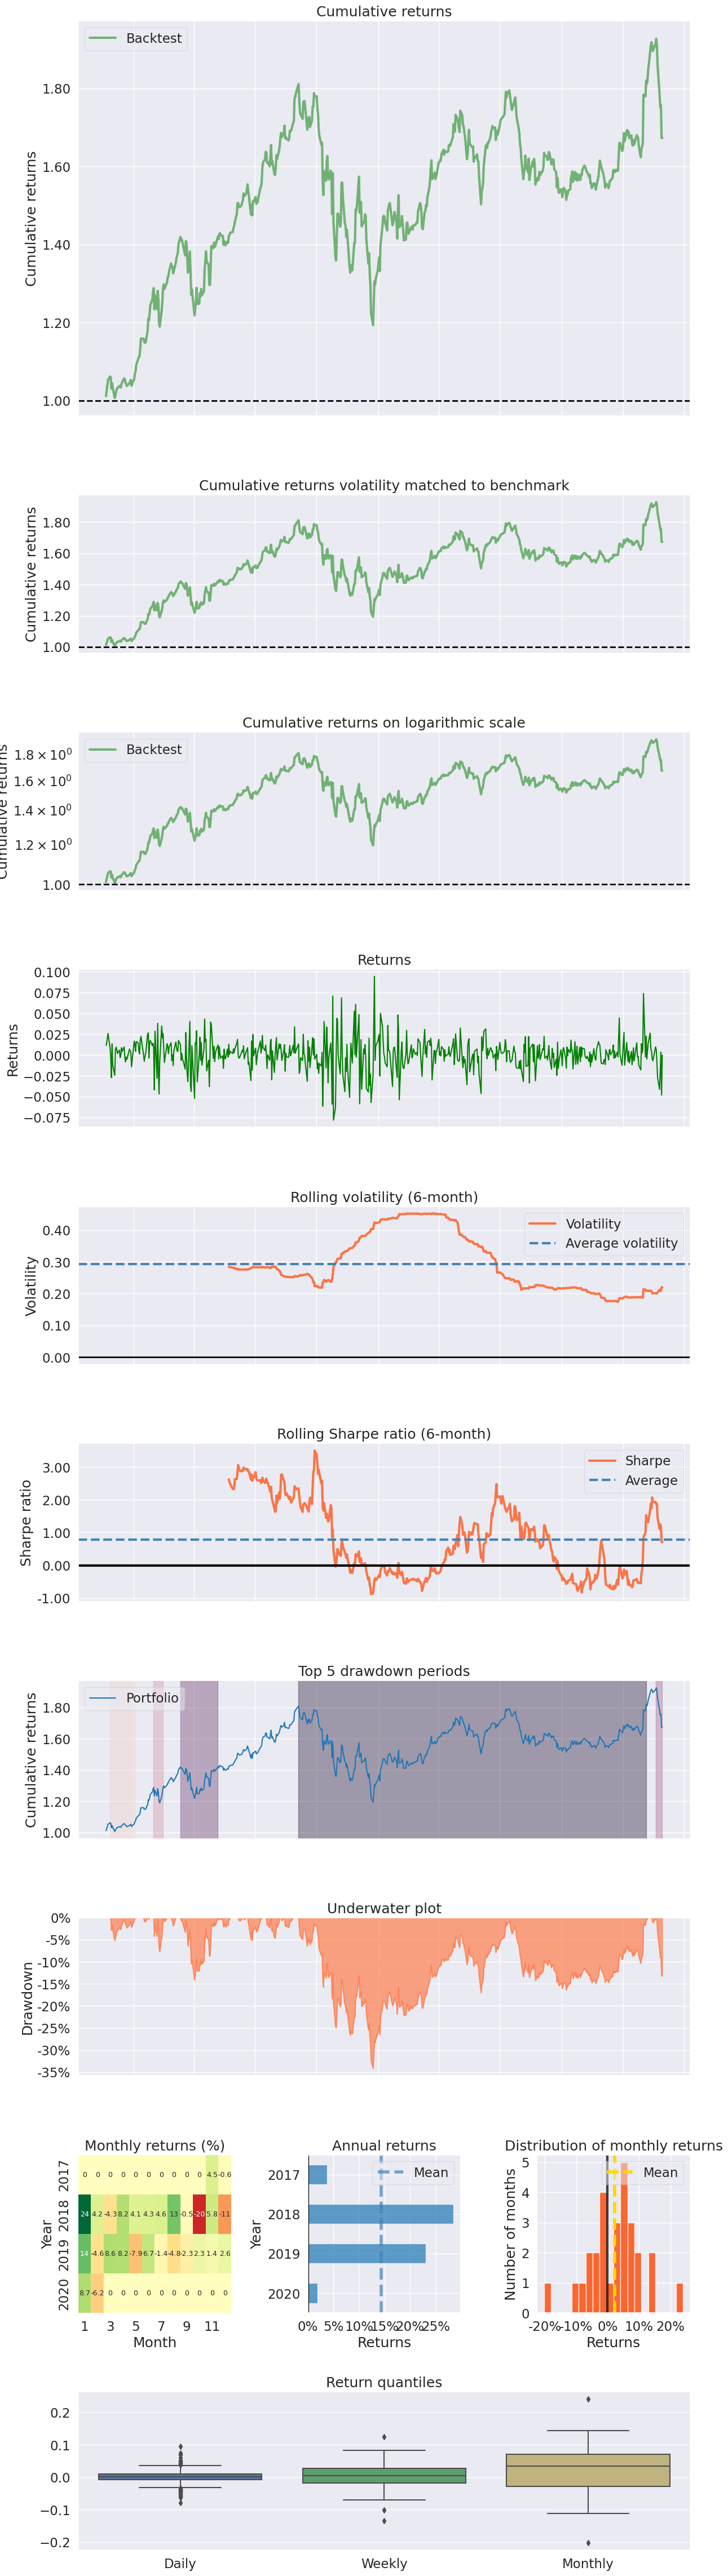

In [227]:
result = pf.create_returns_tear_sheet(AMZN_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
#result.savefig("amzn_prepan_tearsheet.png", format = "png")

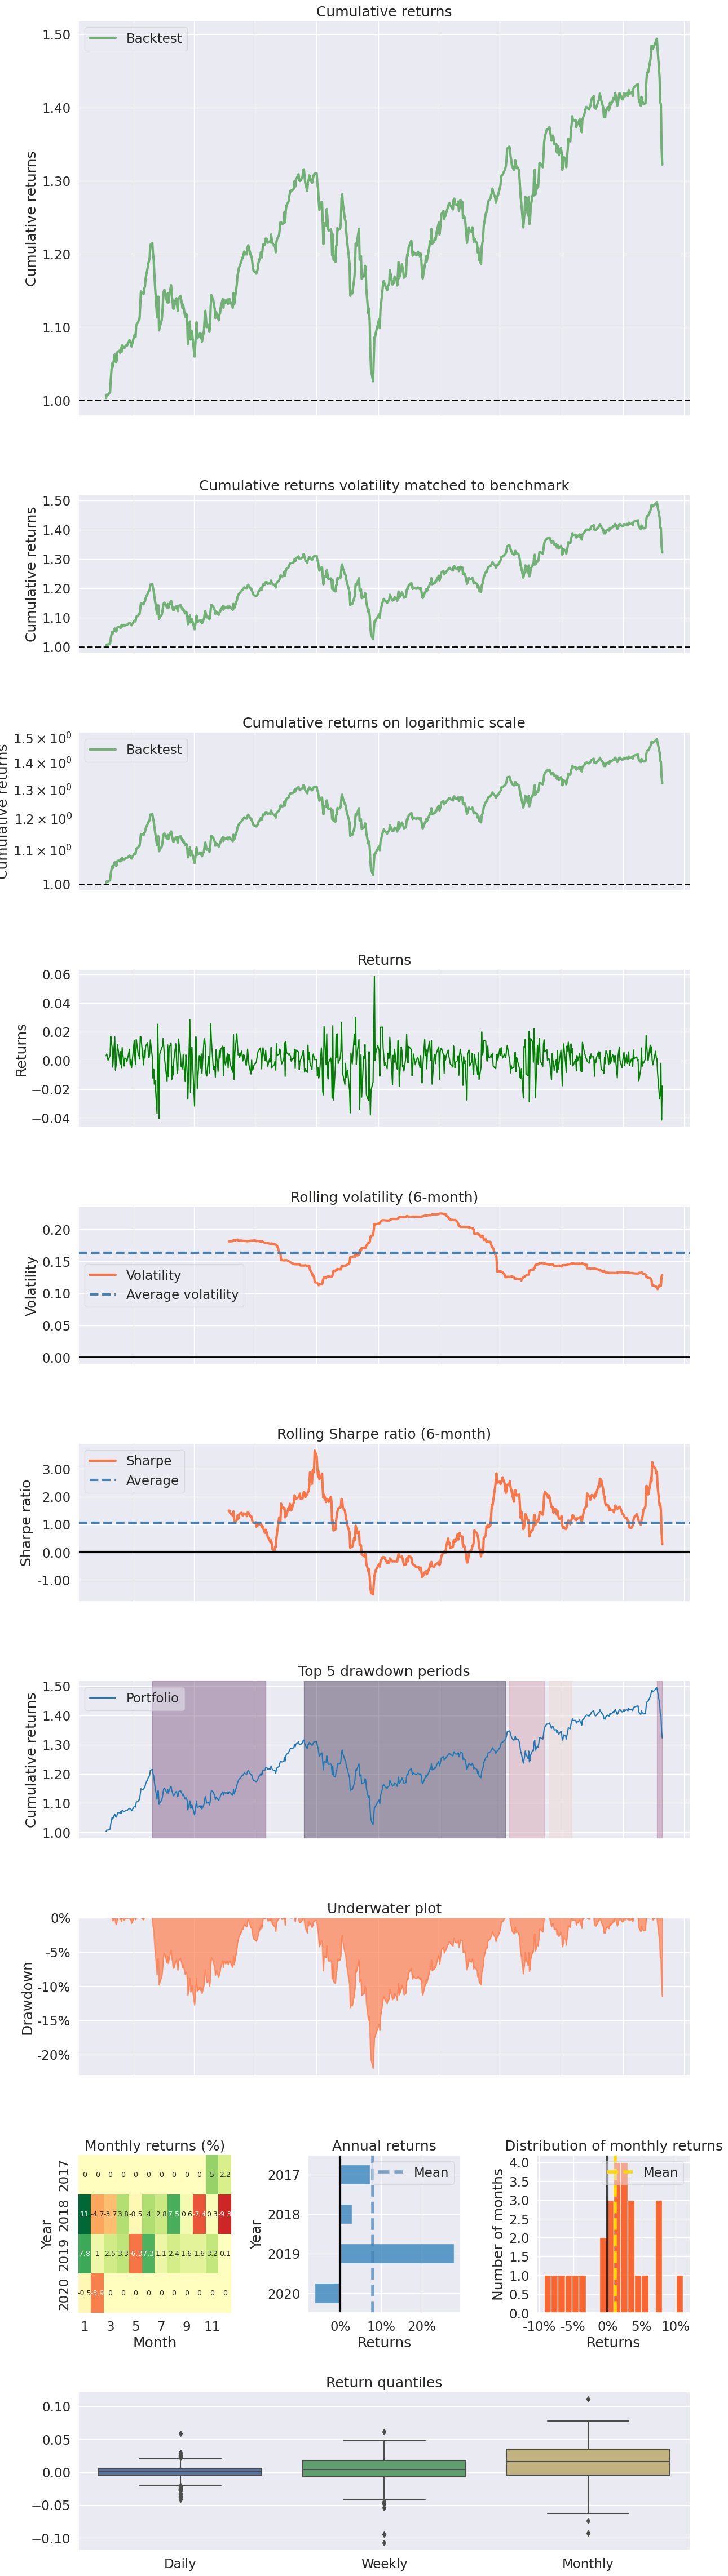

In [229]:
result = pf.create_returns_tear_sheet(RTH_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
#result.savefig("RTH_prepan_tearsheet.png", format = "png")

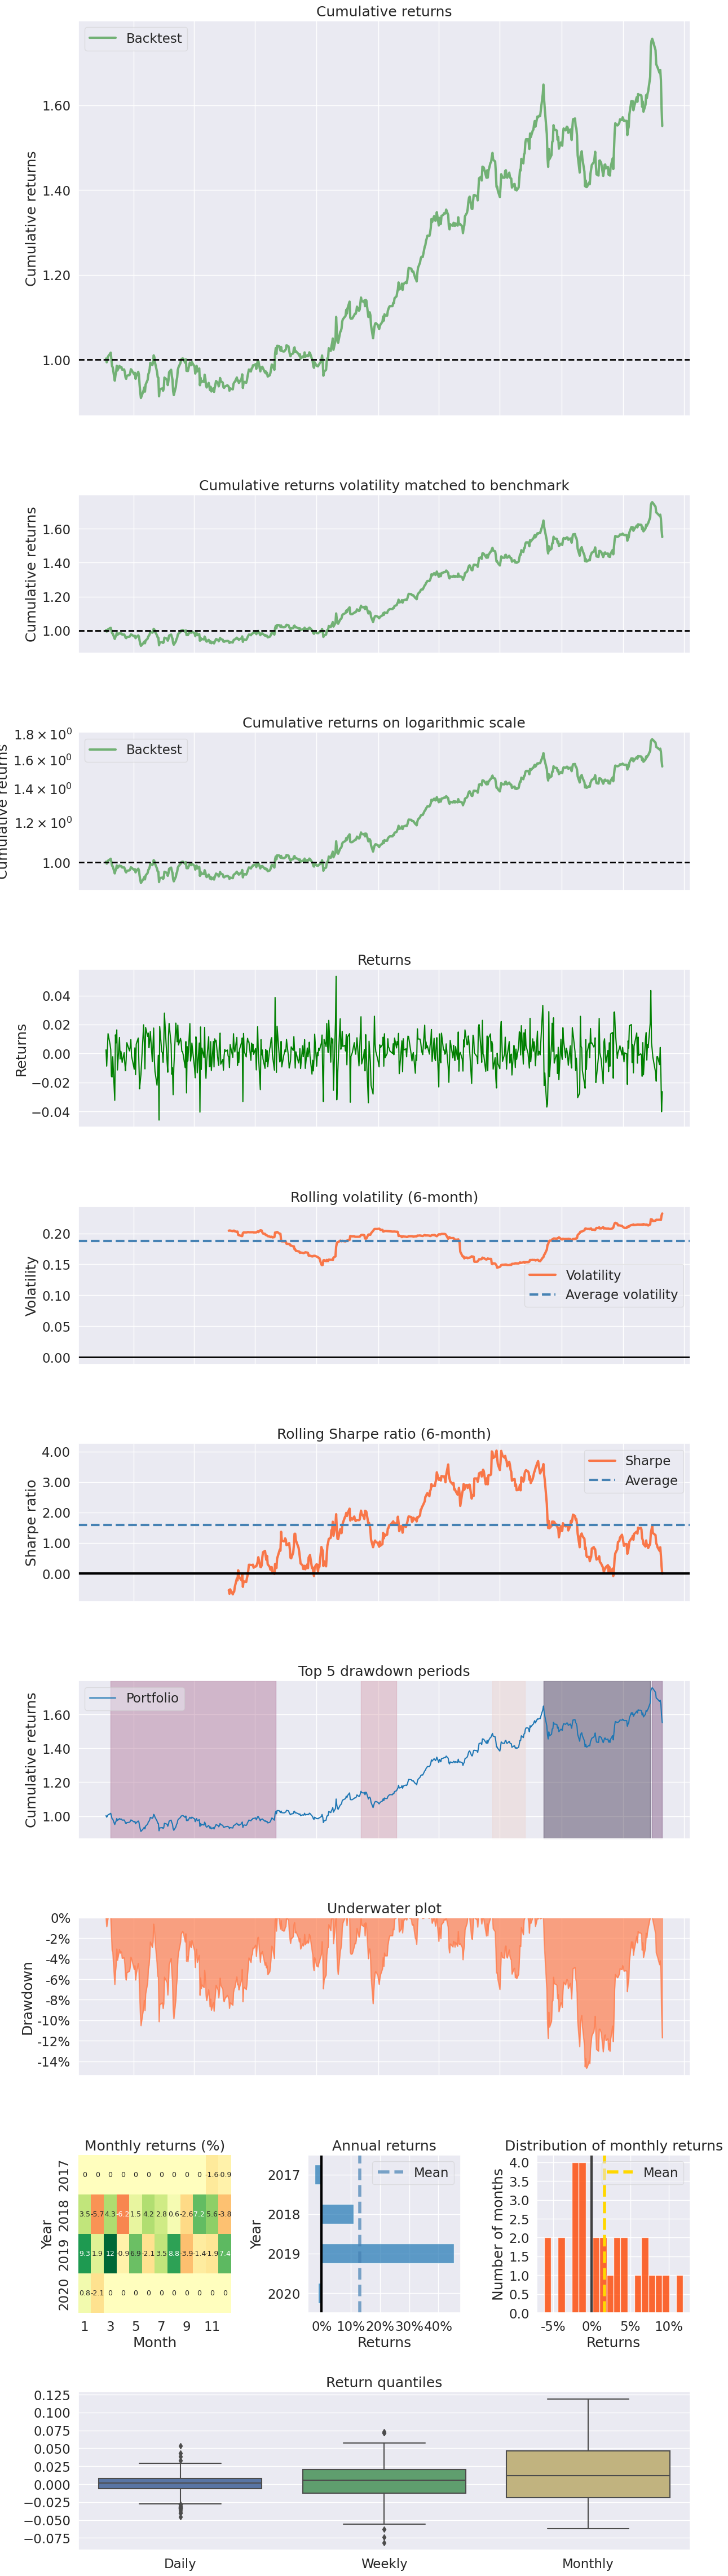

In [230]:
result = pf.create_returns_tear_sheet(AMT_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
#result.savefig("amt_prepan_tearsheet.png", format = "png")

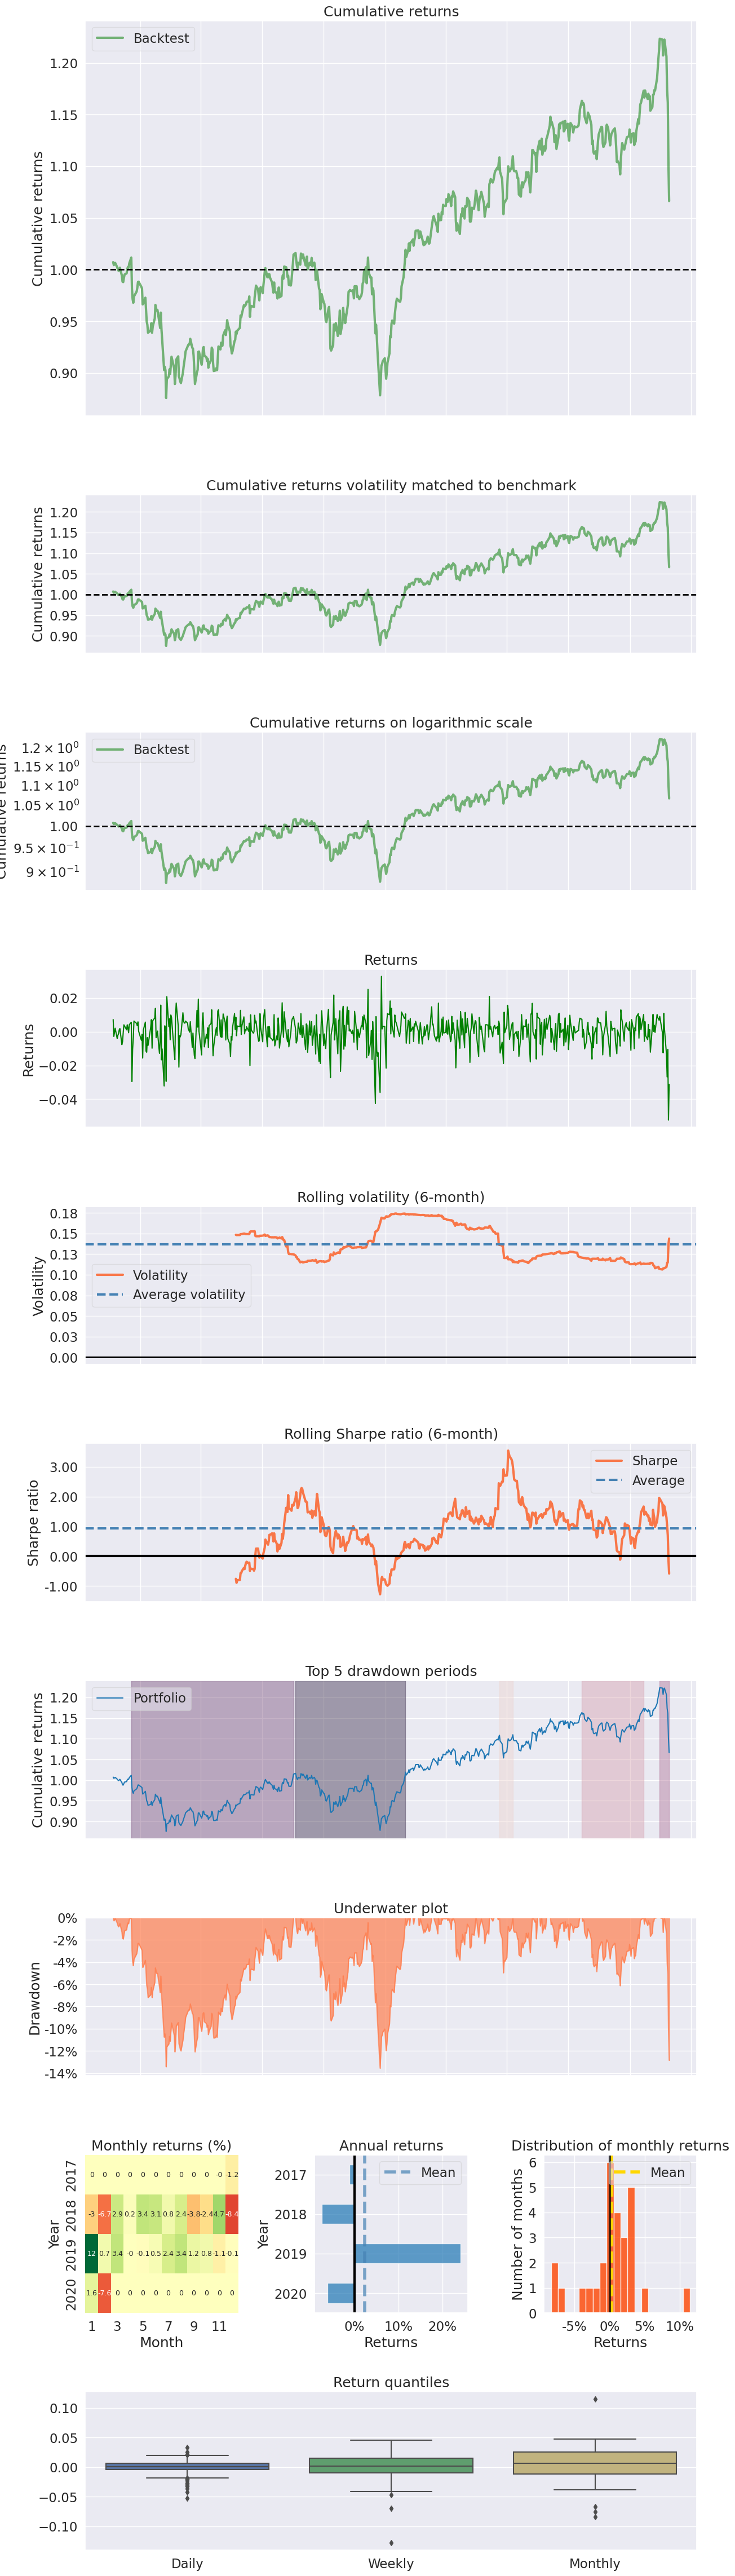

In [231]:
result = pf.create_returns_tear_sheet(IYR_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
#result.savefig("iyr_prepan_tearsheet.png", format = "png")

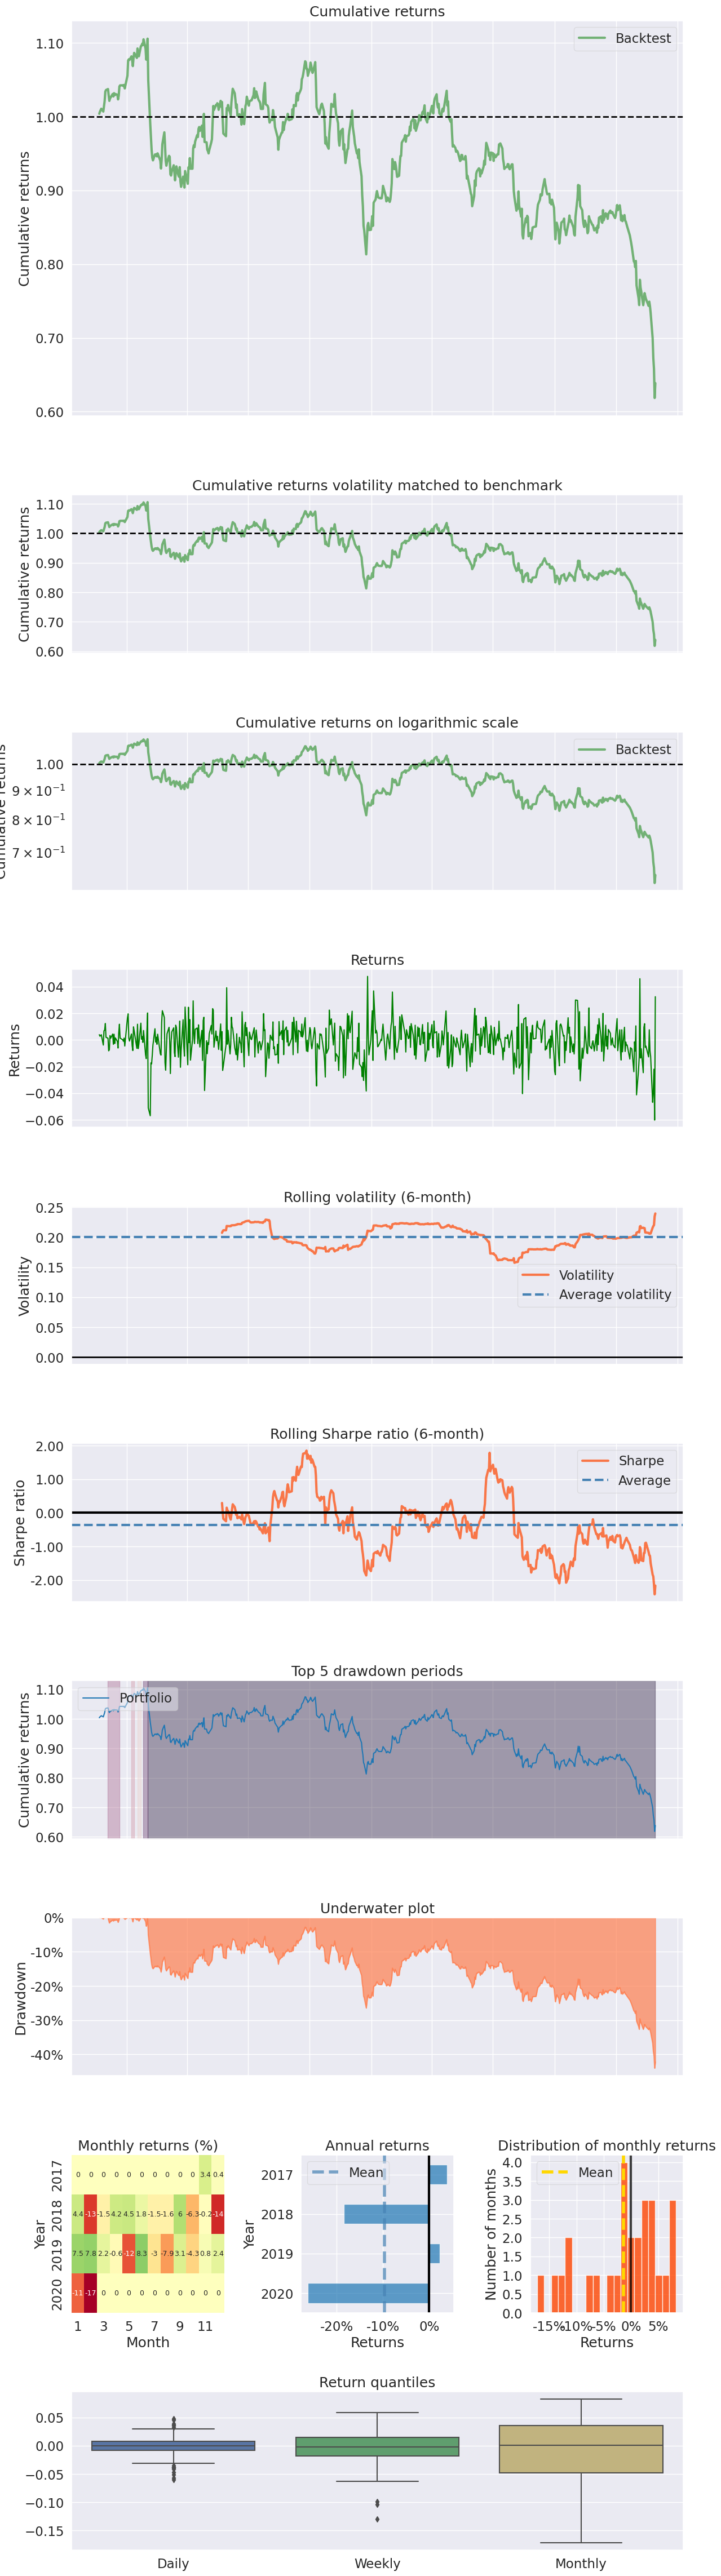

In [232]:
result = pf.create_returns_tear_sheet(XOM_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
#result.savefig("xom_prepan_tearsheet.png", format = "png")

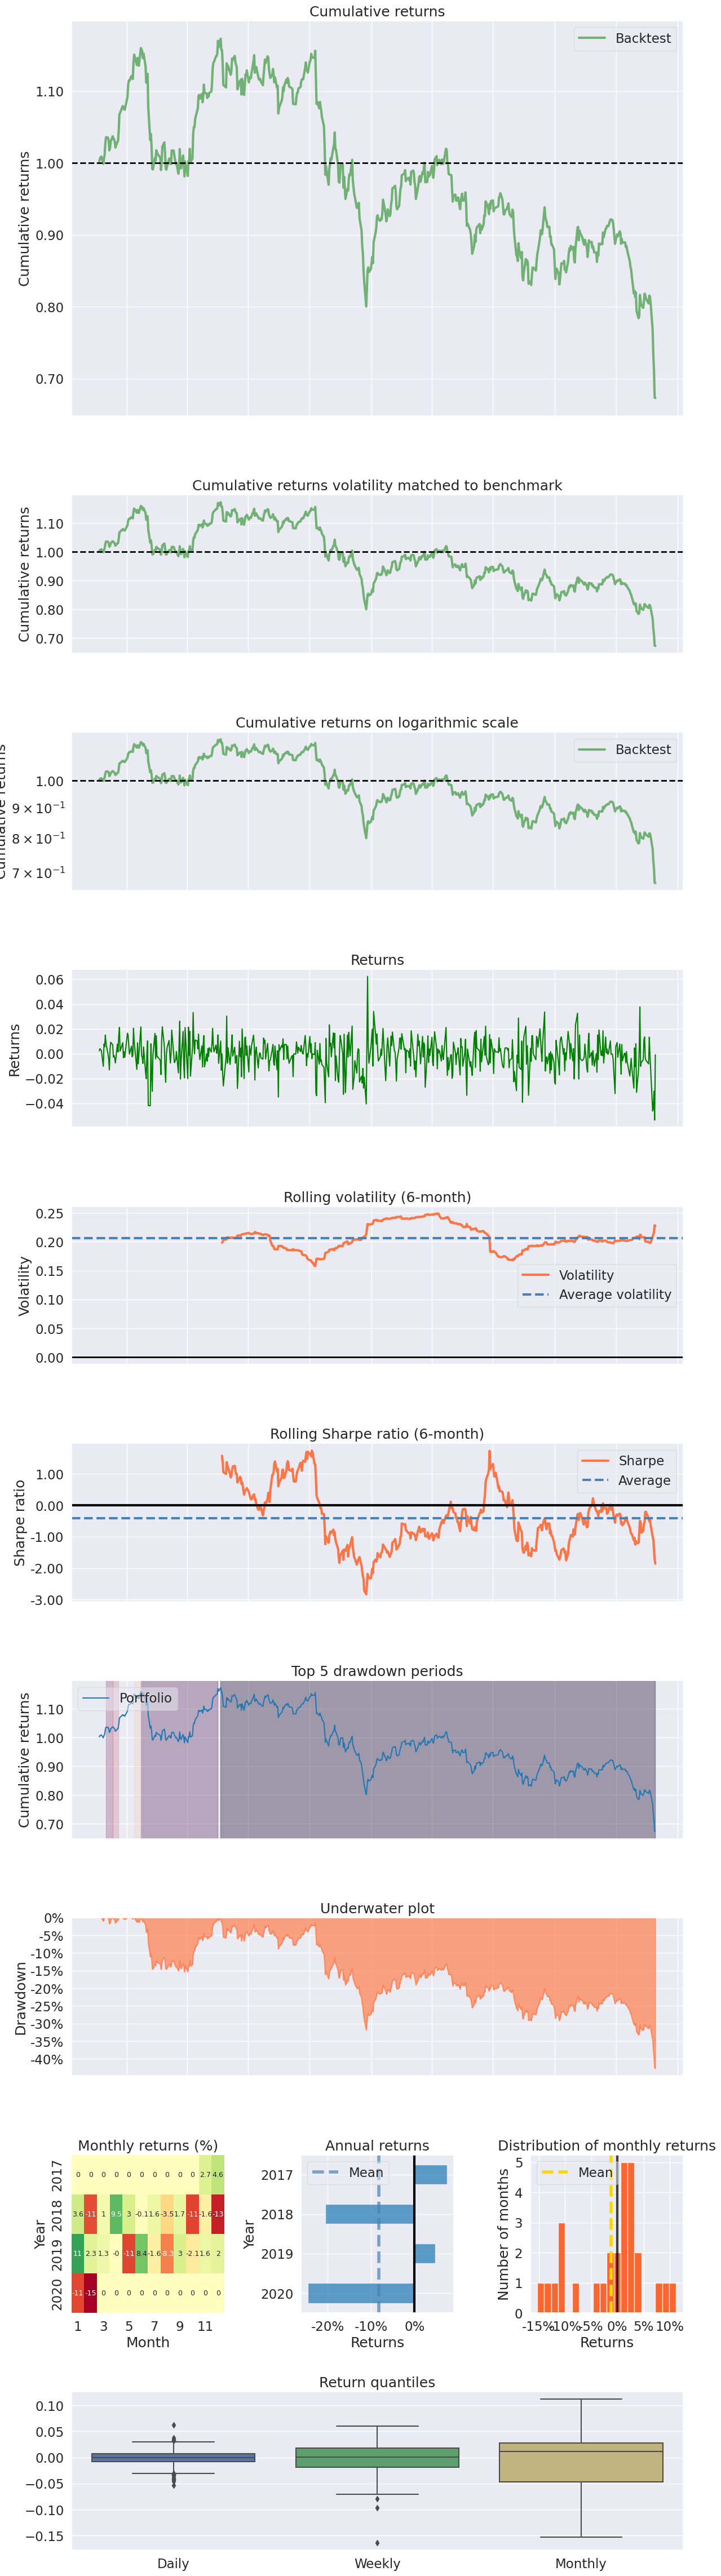

In [233]:
result = pf.create_returns_tear_sheet(XLE_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
#result.savefig("xle_prepan_tearsheet.png", format = "png")


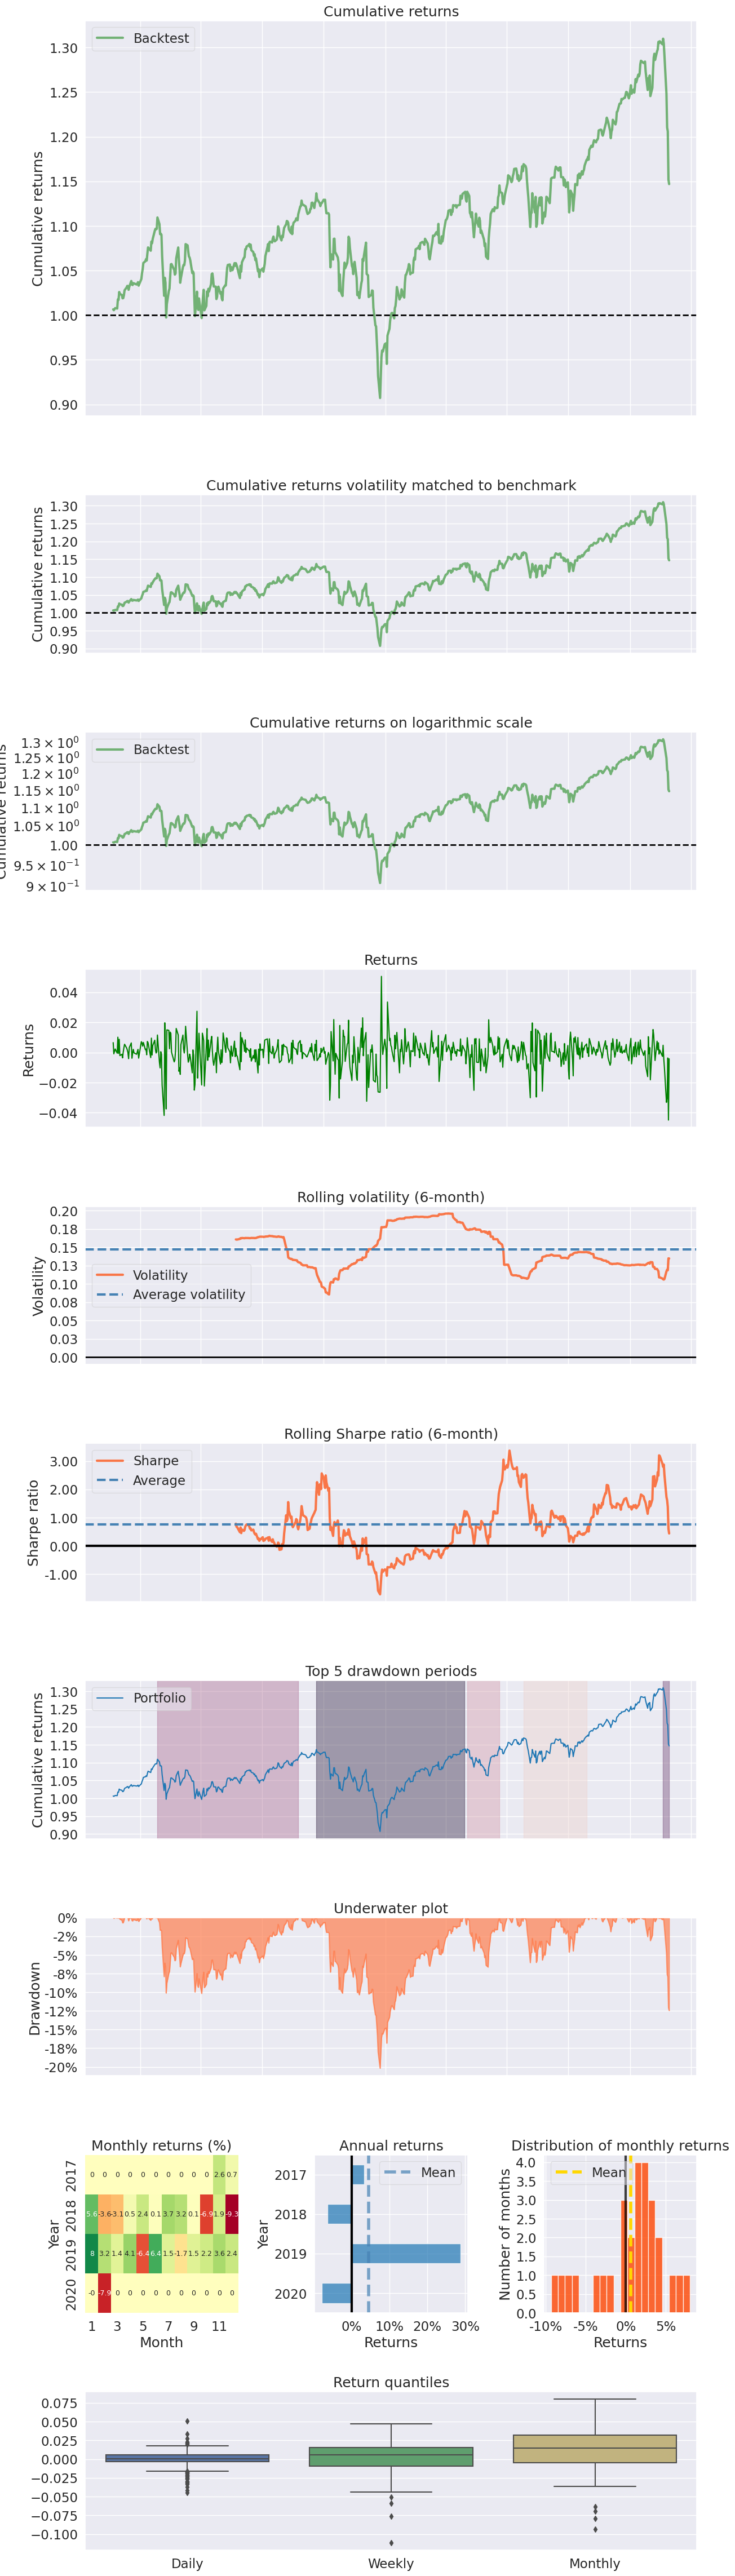

In [234]:
result = pf.create_returns_tear_sheet(SPY_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
#result.savefig("spy_prepan_tearsheet.png", format = "png")

In [ ]:
# Calculate alphas of AMZN
Alpha = R – Rf – beta (Rm-Rf)
AMZN_Alpha = R – Rf – AMZN_beta (Rm-Rf)
# Display the alphas of all stocks and ETFS
AMZN_Alpha

In [ ]:
# Calculate alphas of RTH
RTH_Alpha = R – Rf – RTH_beta (Rm-Rf)
# Display the alphas of all stocks and ETFS
RTH_Alpha

In [ ]:
# Calculate alphas of AMT
AMT_Alpha = R – Rf – AMT_beta (Rm-Rf)
# Display the alphas of all stocks and ETFS
AMT_Alpha

In [ ]:
# Calculate alphas of IYR
IYR_Alpha = R – Rf – IYR_beta (Rm-Rf)
# Display the alphas of all stocks and ETFS
IYR_Alpha

In [ ]:
# Calculate alphas of XOM
XOM_Alpha = R – Rf – XOM_beta (Rm-Rf)
# Display the alphas of all stocks and ETFS
XOM_Alpha

In [ ]:
# Calculate alphas of XLE 
XLEZZ_Alpha = R – Rf – XLE_beta (Rm-Rf)
XLEZZ_Alpha

### A) Analyzing What Would Happen To A Portfolio in Each Sector For the Period Before the Pandemic

In [ ]:
import questionary

In [ ]:
#Questionary SQL
#what kind of investor are you (risk-averse, risk-neutral, risk loving)?

#Which company performed well in pre pandemic?
#Which ETF performed well in pre pandemic?
#Which ticker performed better than SPY?
#Which company performed inversely in pre pandemic?
#Which ETF performed inversely in pre pandemic?



In [ ]:
#Portfolio Returns for Tech: use (portfolio_return = weightAMZN * meanAMZN + weightRTH * meanRTH)


In [ ]:
#Portfolio Returns for Real Estate: use (portfolio_return = weightAMT * meanAMT + weightIYR * meanIYR)



In [ ]:
#Portfolio Returns for Energy: use (portfolio_return = weightXOM * meanXOM + weightXLE * meanXLE)



In [ ]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using tech portfolio returns information
# The ETF SPY will represent the market


In [ ]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using Real Estate portfolio returns information
# The ETF SPY will represent the market


In [ ]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using Energy portfolio returns information
# The ETF SPY will represent the market


In [ ]:
#Calculate the Portfolio Standard Deviation for Tech: use (weightAMZN^2 * MeanAMZN^2 + weightRTH^2 * MeanRTH^2 + 2*weightAMZN*weightRTH*stdevAMZN*stdevRTH*covAMZN,RTH)


In [ ]:
#Calculate the Portfolio Standard Deviation for Real Estate


In [ ]:
#Calculate the Portfolio Standard Deviation for Energy


In [ ]:
# Using the Pandas rolling function in conjunction with the var function, 
# calculate the 30-day rolling variance for the S&P 500 using tech daily returns information

# Visualize the 30-day rolling variance of the S&P 500
# Be sure to adjust the figure size and add a title


In [ ]:
#Monte Carlo Simulation


In [ ]:
#Box and Whisker Plot


In [ ]:
#HVPlot


In [ ]:
#bar plot comparing returns of all sectors 

In [ ]:
#bar plot comparing returns of all portfolio